**The Sparks Foundation internship (January 2023)**

**Name: Nisha Sagar**

**Task 1: Prediction using Supervised ML**

**Problem statement: Predict the percentage of an student based on the no. of study hours using simple linear regression.**

Importing Liabraries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Dataset

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.shape

(25, 2)

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking missing values in the dataset

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.nunique()

Hours     23
Scores    23
dtype: int64

Data visualization

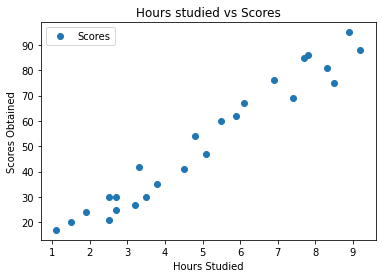

In [ ]:
data.plot(x = 'Hours',y = 'Scores',style='o')
plt.title('Hours studied vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

Study hours and scores obtained have direct replationship with each other. Postitive linear relation is there, so we use linear regrssion alogirthm here for prediction.

Data Preprocessing

In [ ]:
#separating into attributes and labels
X = data.drop(columns='Scores',axis=1)
y = data['Scores']

In [ ]:
# attributes (independent variables)
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [ ]:
# labels (dependent variables)
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

splitting the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Choosing the model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


Model training

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

plotting graph for visual represantation of the regression line

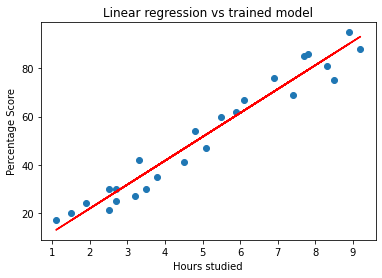

In [ ]:
line = regressor.coef_*X+regressor.intercept_
plt.title("Linear regression vs trained model")
#plotting for the test data
plt.scatter(X, y)
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.plot(X,line, color="red");
plt.show()

Model testing

In [ ]:
print(X_test) # Testing data In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


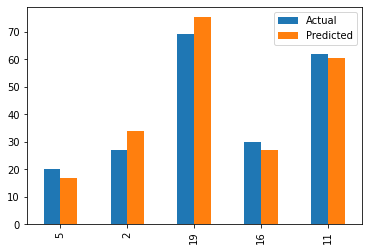

In [ ]:
df.plot(kind="bar")

In [ ]:
#testing the predictions by using the given value
hours = 9.25
prediction = regressor.predict([[hours]])
print("No. of hours studied = {}".format(hours))
print("Marks obtained = {}".format(prediction))

No. of hours studied = 9.25
Marks obtained = [93.69173249]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Evaluating the model

In [ ]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_percentage_error(y_test,regressor.predict(X_test)))

Mean Absolute Error:  0.12568891617045685


Here, the error margin is of 12.5% for this algorithm on this dataset.Generally, we choose the algorithm which have lesser percentage.